In [1]:

# importing basic packages for data preprocessing

import nltk
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Create a Porter Stemmer instance
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
# Load the dataset
df = pd.read_csv('/content/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17596 entries, 0 to 17595
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    17596 non-null  object
 1   Label   17596 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 275.1+ KB


In [28]:
#shortwords
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))
df

,Text,Label,Tokens
0,Damn thought they strict laws Germany,0,"[Damn, thought, strict, law, Germany]"
1,dont care about what stands anything connected...,0,"[dont, care, stand, anything, connected, like,..."
2,It's group it's idea,0,"[It, 's, group, 's, idea]"
3,it's just America!,0,"['s, America, !]"
4,spectacular dancer considering left feet.,0,"[spectacular, dancer, considering, left, foot, .]"
...,...,...,...
17591,find rats nicer cleaner than most Chinese,1,"[find, rat, nicer, cleaner, Chinese]"
17592,"Check this niggar, they things like wild people",1,"[Check, niggar, ,, thing, like, wild, people]"
17593,"this country become absolute shambles, amount ...",0,"[country, become, absolute, shamble, ,, amount..."
17594,aged anti-Semitism aged anti-Semitism doesn't ...,1,"[aged, anti-Semitism, aged, anti-Semitism, n't..."


In [29]:
# Define the remove_stop_words function
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [30]:
# Function to decode HTML entities
def decode_html_entities(text):
    return html.unescape(text)

# Example function to expand contractions
def expand_contractions(text):
   expanded_text = contractions.fix(text)
   return expanded_text


In [31]:

 # Word Tokenization
df['Tokens'] = df['Text'].apply(word_tokenize)
 # Remove stopwords
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [32]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Tokens'] = df['Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [33]:
#Stemming
porter_stemmer = PorterStemmer()
df['Tokens'] = df['Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [34]:
# Remove empty rows
df = df[df['Tokens'].str.strip().astype(bool)]

# Handle missing values
df = df.dropna()

# Verify if there are any empty rows left
print(df['Tokens'].isnull().sum())
df.head()

0


,Text,Label,Tokens
0,Damn thought they strict laws Germany,0,"[Damn, thought, strict, law, Germany]"
1,dont care about what stands anything connected...,0,"[dont, care, stand, anything, connected, like,..."
2,It's group it's idea,0,"[It, 's, group, 's, idea]"
3,it's just America!,0,"['s, America, !]"
4,spectacular dancer considering left feet.,0,"[spectacular, dancer, considering, left, foot, .]"


In [35]:
# Convert string representation of list to actual list first
df['Tokens'] = df['Tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now you can clean up the lists
df['Tokens'] = df['Tokens'].apply(lambda x: [word.strip("[]'").replace("'", "") for word in x] if isinstance(x, list) else x)

# Display the first few rows to verify
print("\nDataFrame after converting Tokens to lists and cleaning:")
print(df.head())



DataFrame after converting Tokens to lists and cleaning:
                                                Text  Label  \
0              Damn thought they strict laws Germany      0   
1  dont care about what stands anything connected...      0   
2                               It's group it's idea      0   
3                                 it's just America!      0   
4          spectacular dancer considering left feet.      0   

                                              Tokens  
0              [Damn, thought, strict, law, Germany]  
1  [dont, care, stand, anything, connected, like,...  
2                            [It, s, group, s, idea]  
3                                    [s, America, !]  
4  [spectacular, dancer, considering, left, foot, .]  


In [36]:
X = df[['Tokens']]
y = df['Label']

In [37]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

# Check if 'tweet' column contains strings, if so, split them into lists of tokens
if isinstance(X['Tokens'].iloc[0], str):
    X['Tokens'] = X['Tokens'].str.split()  # Split strings into lists of words

# Now join the tokens into a single string
X['Tokens'] = X['Tokens'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer for the 'tweet_tokens' column
column_transformer = ColumnTransformer(
    transformers=[
        ('Tokens', TfidfVectorizer(), 'Tokens')
    ],
    remainder='passthrough'  # This keeps the other columns as is
)

<ipython-input-37-74eba3d3017a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Tokens'] = X['Tokens'].apply(lambda x: ' '.join(x))


Data Visualization

Train, Test and Validation Test data size

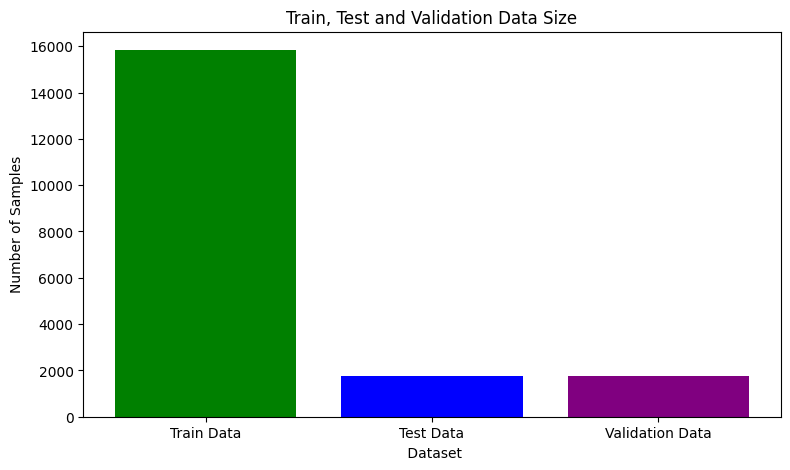

In [43]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
X = df['Text']
# Use the 'label' column for labels
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
# Handle missing values in 'Text' column
df['Text'] = df['Text'].fillna('')  # Replace NaN with empty strings

# Train, Test and Validation test data size
train_size = len(X_train)
test_size = len(X_test)
validation_size = len(X_test)

plt.figure(figsize=(9, 5))
plt.bar(['Train Data', 'Test Data', 'Validation Data'], [train_size, test_size, validation_size], color=['green', 'blue', 'purple'])
plt.title('Train, Test and Validation Data Size')
plt.xlabel(' Dataset')
plt.ylabel('Number of Samples')
plt.show()

Label wise split in Train Data

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Input, Flatten, SpatialDropout1D, Bidirectional, Reshape
from sklearn.metrics import accuracy_score, classification_report
# Use the 'Text' column for text data# Use TfidfVectorizer for the 'Tokens' column
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Text'])

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle class imbalance by converting labels to one-hot encoding
y_categorical = to_categorical(y_encoded)

In [46]:
# Define CNN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_tfidf.shape[1],)))
model.add(Reshape((512, 1)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32,kernel_size=5,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten()) # Flatten the output from MaxPooling1D
model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

# Sort the indices of the sparse matrix
X_tfidf.sort_indices()

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y_categorical, test_size=0.1, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy:.3f}')

Epoch 1/15
495/495 [==============================] - 151s 301ms/step - loss: 0.6278 - accuracy: 0.6438 - val_loss: 0.5898 - val_accuracy: 0.6852
Epoch 2/15
495/495 [==============================] - 152s 307ms/step - loss: 0.4230 - accuracy: 0.8012 - val_loss: 0.6588 - val_accuracy: 0.6506
Epoch 3/15
495/495 [==============================] - 150s 303ms/step - loss: 0.2250 - accuracy: 0.9031 - val_loss: 0.9413 - val_accuracy: 0.6545
Epoch 4/15
495/495 [==============================] - 151s 305ms/step - loss: 0.1244 - accuracy: 0.9446 - val_loss: 1.4739 - val_accuracy: 0.6472
Epoch 5/15
495/495 [==============================] - 151s 306ms/step - loss: 0.0855 - accuracy: 0.9619 - val_loss: 1.4421 - val_accuracy: 0.6432
Epoch 6/15
55/55 [==============================] - 1s 11ms/step - loss: 1.8625 - accuracy: 0.6352
Validation accuracy: 0.635


Ploting the Confusion Matrix and Classification Report of best Model

55/55 [==============================] - 1s 10ms/step
confusion Matrix:
 [[667 360]
 [282 451]]


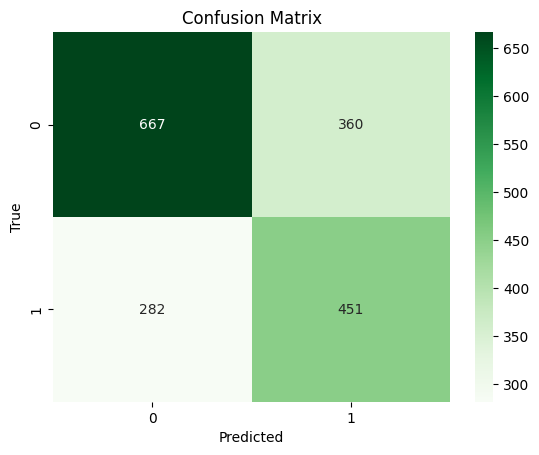

In [47]:
# Predict probabilities on the validation set
y_pred_probs = model.predict(X_val)

# Get predicted labels (class with highest probability)
y_pred = np.argmax(y_pred_probs, axis=1)

# Inverse transform encoded true labels to original form
y_val_original = np.argmax(y_val, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val_original, y_pred)
print("confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [48]:

# Extracting metrics separately
print("Accuracy:", accuracy_score(y_val_original, y_pred))
print("Classification Report:\n", classification_report(y_val_original, y_pred))

accuracy = accuracy_score(y_val_original, y_pred)

classification_report_dict = classification_report(y_val_original, y_pred, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']


Accuracy: 0.6352272727272728
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.68      1027
           1       0.56      0.62      0.58       733

    accuracy                           0.64      1760
   macro avg       0.63      0.63      0.63      1760
weighted avg       0.64      0.64      0.64      1760



Prediction on Test Cases

In [53]:
test_cases = [
    "Ironic of him to call her a monkey",
"So stunning and brave"
]

In [54]:
# Preprocessing on test cases
def preprocessing_test_cases(test_cases):
  t_case_tokenization = [word_tokenize(text) for text in test_cases]
  # stopwords removeal
  stop_words = set(stopwords.words('english')) # Assuming you want to remove English stopwords
  t_case_stopword_remove = [remove_stop_words(tweet_tokens) for tweet_tokens in t_case_tokenization]

  # lemmetization
  t_case_lemmetization = []
  for text in t_case_stopword_remove: # Iterate over lists of words
    lemmas = [lemmatizer.lemmatize(word) for word in text] # Lemmatize each word individually
    t_case_lemmetization.append(lemmas)
  # joining tokens
  t_cases_joined = [' '.join(text) for text in t_case_lemmetization]
  return t_cases_joined
# preprocessed test cases
preprocessed_test_cases = preprocessing_test_cases(test_cases)

# Use TfidfVectorizer to transform test cases
t_cases_tfidf = tfidf.transform(preprocessed_test_cases)

# Predict classes for test cases
predictions = model.predict(t_cases_tfidf.toarray())

1/1 [==============================] - 0s 72ms/step


In [56]:
# predictions
prediction_classes = [0 if prediction.argmax() == 1 else 1 for prediction in predictions]

# Display results
for i, text in enumerate(test_cases):
    label = "Hate Speech" if prediction_classes[i] == 0 else "Not Hate Speech" # Use the correct variable name here
    print(f'Text: "{text}" - Prediction: {label}')

# Save predictions and test cases to a DataFrame
results_df = pd.DataFrame({'Text': test_cases, 'Prediction Class': prediction_classes})


Text: "Ironic of him to call her a monkey" - Prediction: Hate Speech
Text: "So stunning and brave" - Prediction: Not Hate Speech
